### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [4]:
# Calculando o faturamento total de cada loja (coluna 'Preço' com P maiúsculo)
faturamento_loja1 = loja["Preço"].sum()
faturamento_loja2 = loja2["Preço"].sum()
faturamento_loja3 = loja3["Preço"].sum()
faturamento_loja4 = loja4["Preço"].sum()


In [5]:
# Exibindo os resultados
print(f"Faturamento Loja 1: R$ {faturamento_loja1:,.2f}")
print(f"Faturamento Loja 2: R$ {faturamento_loja2:,.2f}")
print(f"Faturamento Loja 3: R$ {faturamento_loja3:,.2f}")
print(f"Faturamento Loja 4: R$ {faturamento_loja4:,.2f}")

Faturamento Loja 1: R$ 1,534,509.12
Faturamento Loja 2: R$ 1,488,459.06
Faturamento Loja 3: R$ 1,464,025.03
Faturamento Loja 4: R$ 1,384,497.58


# 2. Vendas por Categoria


In [6]:
# Quantidade de produtos vendidos por categoria em cada loja
vendas_categoria_loja1 = loja.groupby("Categoria do Produto").size().sort_values(ascending=False)
vendas_categoria_loja2 = loja2.groupby("Categoria do Produto").size().sort_values(ascending=False)
vendas_categoria_loja3 = loja3.groupby("Categoria do Produto").size().sort_values(ascending=False)
vendas_categoria_loja4 = loja4.groupby("Categoria do Produto").size().sort_values(ascending=False)

In [7]:
# Exibindo os resultados
print("Loja 1:\n", vendas_categoria_loja1, "\n")
print("Loja 2:\n", vendas_categoria_loja2, "\n")
print("Loja 3:\n", vendas_categoria_loja3, "\n")
print("Loja 4:\n", vendas_categoria_loja4, "\n")

Loja 1:
 Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
dtype: int64 

Loja 2:
 Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
dtype: int64 

Loja 3:
 Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
dtype: int64 

Loja 4:
 Categoria do Produto
moveis                   480
eletronicos              451
brinquedos               338
esporte e lazer          277
eletrodomesticos       

# 3. Média de Avaliação das Lojas

In [8]:
# Média das avaliações dos clientes por loja
media_avaliacao_loja1 = loja["Avaliação da compra"].mean()
media_avaliacao_loja2 = loja2["Avaliação da compra"].mean()
media_avaliacao_loja3 = loja3["Avaliação da compra"].mean()
media_avaliacao_loja4 = loja4["Avaliação da compra"].mean()

In [9]:
# Exibindo os resultados
print(f"Média de Avaliação - Loja 1: {media_avaliacao_loja1:.2f}")
print(f"Média de Avaliação - Loja 2: {media_avaliacao_loja2:.2f}")
print(f"Média de Avaliação - Loja 3: {media_avaliacao_loja3:.2f}")
print(f"Média de Avaliação - Loja 4: {media_avaliacao_loja4:.2f}")

Média de Avaliação - Loja 1: 3.98
Média de Avaliação - Loja 2: 4.04
Média de Avaliação - Loja 3: 4.05
Média de Avaliação - Loja 4: 4.00


# 4. Produtos Mais e Menos Vendidos

In [10]:
# Função auxiliar para mostrar o mais e o menos vendido
def produto_destaque(df, loja_nome):
    vendas = df["Produto"].value_counts()
    mais_vendido = vendas.idxmax()
    menos_vendido = vendas.idxmin()
    print(f"{loja_nome} - Mais vendido: {mais_vendido} ({vendas.max()} vendas)")
    print(f"{loja_nome} - Menos vendido: {menos_vendido} ({vendas.min()} vendas)\n")

In [11]:
# Aplicando para cada loja
produto_destaque(loja, "Loja 1")
produto_destaque(loja2, "Loja 2")
produto_destaque(loja3, "Loja 3")
produto_destaque(loja4, "Loja 4")

Loja 1 - Mais vendido: Micro-ondas (60 vendas)
Loja 1 - Menos vendido: Headset (33 vendas)

Loja 2 - Mais vendido: Iniciando em programação (65 vendas)
Loja 2 - Menos vendido: Jogo de tabuleiro (32 vendas)

Loja 3 - Mais vendido: Kit banquetas (57 vendas)
Loja 3 - Menos vendido: Blocos de montar (35 vendas)

Loja 4 - Mais vendido: Cama box (62 vendas)
Loja 4 - Menos vendido: Guitarra (33 vendas)



# 5. Frete Médio por Loja


In [12]:
# Custo médio de frete por loja
frete_medio_loja1 = loja["Frete"].mean()
frete_medio_loja2 = loja2["Frete"].mean()
frete_medio_loja3 = loja3["Frete"].mean()
frete_medio_loja4 = loja4["Frete"].mean()



In [13]:

# Exibindo os resultados
print(f"Custo médio de frete - Loja 1: R$ {frete_medio_loja1:.2f}")
print(f"Custo médio de frete - Loja 2: R$ {frete_medio_loja2:.2f}")
print(f"Custo médio de frete - Loja 3: R$ {frete_medio_loja3:.2f}")
print(f"Custo médio de frete - Loja 4: R$ {frete_medio_loja4:.2f}")

Custo médio de frete - Loja 1: R$ 34.69
Custo médio de frete - Loja 2: R$ 33.62
Custo médio de frete - Loja 3: R$ 33.07
Custo médio de frete - Loja 4: R$ 31.28


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ativando estilo do seaborn
sns.set(style="whitegrid")

# Dados para gráficos
faturamentos = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]
fretes = [frete_medio_loja1, frete_medio_loja2, frete_medio_loja3, frete_medio_loja4]
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

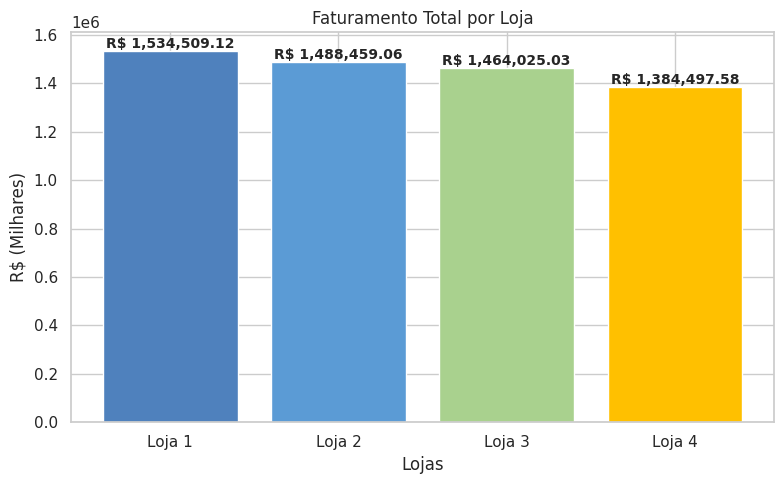

In [18]:
# 1. Gráfico de barras com valores no topo
plt.figure(figsize=(8, 5))
colors = ["#4F81BD", "#5B9BD5", "#A9D18E", "#FFC000"]
bars = plt.bar(lojas, faturamentos, color=colors)

# Adicionando os valores no topo de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"R$ {height:,.2f}",
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight='bold'
    )

plt.title("Faturamento Total por Loja")
plt.ylabel("R$ (Milhares)")
plt.xlabel("Lojas")
plt.tight_layout()
plt.show()


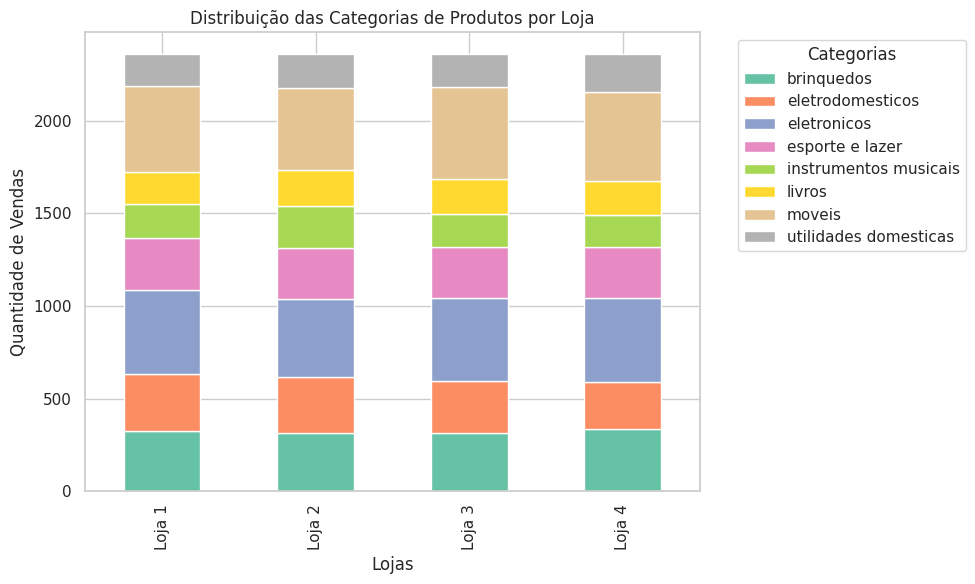

In [22]:
# 2. Gráfico de barras empilhadas: Categorias por loja
categorias_lojas = pd.DataFrame({
    "Loja 1": loja["Categoria do Produto"].value_counts(),
    "Loja 2": loja2["Categoria do Produto"].value_counts(),
    "Loja 3": loja3["Categoria do Produto"].value_counts(),
    "Loja 4": loja4["Categoria do Produto"].value_counts(),
}).fillna(0)

categorias_lojas.T.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="Set2")
plt.title("Distribuição das Categorias de Produtos por Loja")
plt.ylabel("Quantidade de Vendas")
plt.xlabel("Lojas")
plt.legend(title="Categorias", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


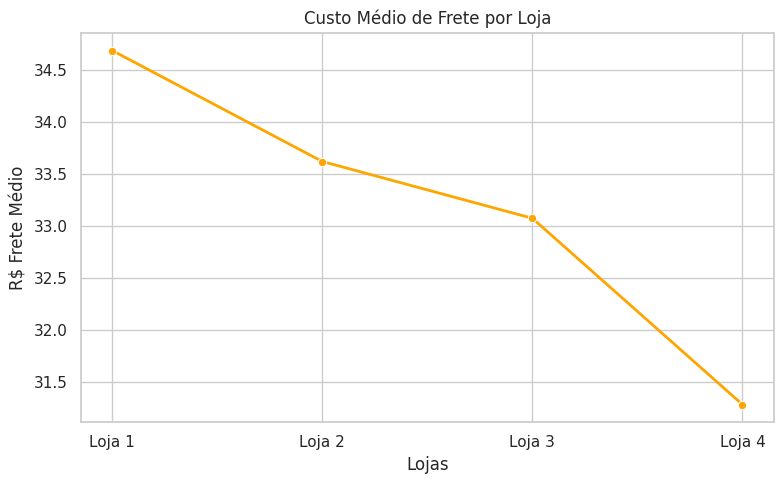

In [21]:
# 3. Gráfico de linhas: Custo médio de frete por loja
plt.figure(figsize=(8, 5))
sns.lineplot(x=lojas, y=fretes, marker="o", linewidth=2, color="orange")
plt.title("Custo Médio de Frete por Loja")
plt.ylabel("R$ Frete Médio")
plt.xlabel("Lojas")
plt.grid(True)
plt.tight_layout()
plt.show()

# **Relatório Final: Qual Loja Vender?**

# Introdução
O objetivo desta análise foi avaliar o desempenho de quatro lojas a partir de indicadores essenciais – faturamento total, distribuição de categorias de produtos, avaliação dos clientes, vendas de produtos individuais e custo médio de frete. Essa avaliação permitiu identificar pontos fortes e áreas de melhoria, oferecendo subsídio para decidir qual loja apresenta o desempenho mais fraco e, portanto, seria a candidata à venda.

# **Desenvolvimento**
# Faturamento Total

Loja 1: R$ 1.534.509,12

Loja 2: R$ 1.488.459,06

Loja 3: R$ 1.464.025,03

Loja 4: R$ 1.384.497,58

A análise mostra que a Loja 1 lidera em faturamento, enquanto a Loja 4 apresenta o menor valor, indicando menor volume de negócios.

# Categorias de Produtos Vendidos
Todas as lojas seguem um padrão semelhante, com “móveis” e “eletrônicos” entre as categorias mais vendidas. No entanto, a quantidade absoluta de vendas em cada categoria também acompanha a tendência do faturamento, onde a Loja 4 tem números inferiores em comparação às demais.

# Avaliação dos Clientes

Loja 1: 3,98

Loja 2: 4,04

Loja 3: 4,05

Loja 4: 4,00

Apesar das diferenças serem sutis, as avaliações indicam que as Lojas 2 e 3 têm uma ligeira vantagem em termos de satisfação, enquanto a Loja 1 apresenta a menor nota. A Loja 4, ainda que não seja a pior nesse quesito, fica abaixo dos melhores desempenhos.

# Produtos Mais e Menos Vendidos

Cada loja tem um produto “estrela” e outro com menor performance. Por exemplo, a Loja 1 destaca-se com o Micro-ondas (60 vendas) e apresenta o Headset com menor performance (33 vendas), enquanto as demais lojas possuem variações próximas, mas sem discrepâncias que indicariam problemas isolados no mix de produtos.

A concentração de vendas em determinados produtos pode refletir tanto uma estratégia assertiva quanto uma dependência excessiva de um item; entretanto, nesse contexto, os volumes absolutos reforçam o cenário de que a Loja 4 tem menor amplitude em suas vendas.

# Custo Médio de Frete

Loja 1: R$ 34,69

Loja 2: R$ 33,62

Loja 3: R$ 33,07

Loja 4: R$ 31,28

A Loja 4 apresenta o menor custo médio de frete, o que é positivo operacionalmente; contudo, esse benefício não compensa o quadro de menor faturamento e desempenho global.

# **Conclusão**
Considerando todos os fatores analisados, a **Loja 4** se destaca como a candidata ideal para venda. Embora apresente o menor custo de frete, seus indicadores de faturamento e o volume de vendas por categoria são os mais baixos dentre as quatro lojas. Além disso, as avaliações dos clientes, embora não drásticas, demonstram que a Loja 4 não se destaca positivamente em comparação à Loja 2 e à Loja 3.

Portanto, recomendo que o Sr. João venda a **Loja 4**, pois ela apresenta menores indicadores de receita e desempenho no mix de produtos, o que sugere um potencial de crescimento mais limitado e margens possivelmente inferiores em relação às demais lojas.

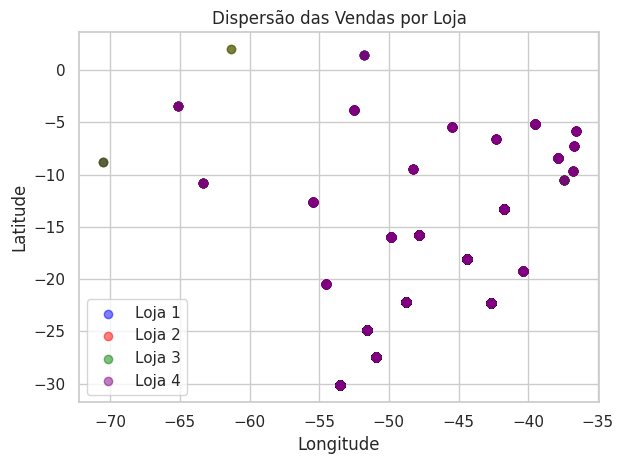

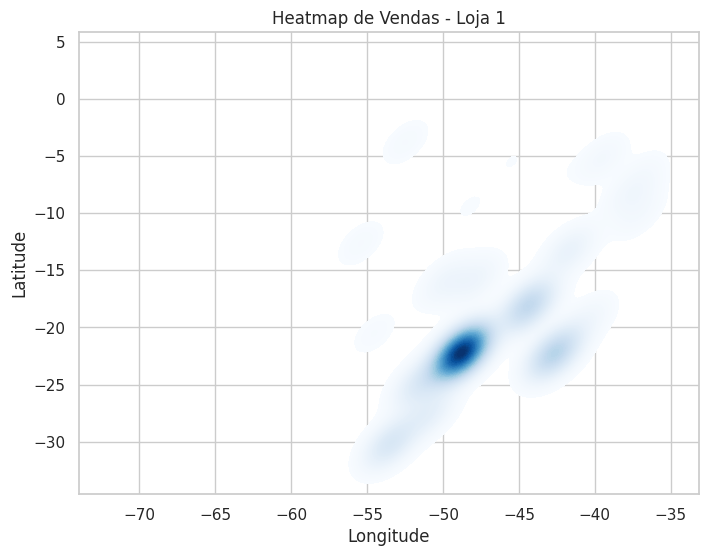

In [26]:
# ------------------------------
# 1. Gráficos de Dispersão
# ------------------------------
plt.scatter(loja["lon"], loja["lat"], color='blue', alpha=0.5, label="Loja 1")
plt.scatter(loja2["lon"], loja2["lat"], color='red', alpha=0.5, label="Loja 2")
plt.scatter(loja3["lon"], loja3["lat"], color='green', alpha=0.5, label="Loja 3")
plt.scatter(loja4["lon"], loja4["lat"], color='purple', alpha=0.5, label="Loja 4")

plt.title("Dispersão das Vendas por Loja")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.tight_layout()
plt.show()

# ------------------------------
# 2. Heatmaps com KDE
# ------------------------------
# Aqui, demonstramos heatmaps para visualizar a densidade de vendas em, pelo menos, uma loja.
# Repita o procedimento para as demais se desejar.
plt.figure(figsize=(8, 6))
sns.kdeplot(data=loja, x="lon", y="lat", cmap="Blues", fill=True, thresh=0.05, levels=100)
plt.title("Heatmap de Vendas - Loja 1")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
